# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
api_key

'7dbc5e7400f8a3367c01d385a652423d'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [4]:
cities

['ewa beach',
 'kruisfontein',
 'norman wells',
 'butaritari',
 'sulangan',
 'albany',
 'paoua',
 'taolanaro',
 'ribeira grande',
 'leningradskiy',
 'thompson',
 'lorengau',
 'mataura',
 'samusu',
 'issaquah',
 'alice springs',
 'atuona',
 'mount gambier',
 'alofi',
 'jinchang',
 'saskylakh',
 'nassau',
 'gaomi',
 'upernavik',
 'umm lajj',
 'hilo',
 'mys shmidta',
 'lodja',
 'new norfolk',
 'rikitea',
 'barrow',
 'fort saint john',
 'general roca',
 'puerto ayora',
 'provideniya',
 'hobart',
 'vaini',
 'kapaa',
 'punta arenas',
 'sao jose da coroa grande',
 'east london',
 'vila franca do campo',
 'oussouye',
 'amderma',
 'gamba',
 'makakilo city',
 'taltal',
 'cape town',
 'ushuaia',
 'clyde river',
 'mangan',
 'sarkand',
 'bredasdorp',
 'belushya guba',
 'ahipara',
 'farah',
 'san patricio',
 'palauig',
 'chingirlau',
 'foumban',
 'khatanga',
 'qaqortoq',
 'davila',
 'coquimbo',
 'salalah',
 'auki',
 'butterworth',
 'jiuquan',
 'bluff',
 'tura',
 'coihaique',
 'vila velha',
 'qaanaaq

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
# Build query URL

weather_response = requests.get(query_url)
weather_data_json = weather_response.json()
weather_data = []
record_number = 1

for city in cities:
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city
    weather_response = requests.get(query_url)
    weather_data_json = weather_response.json()

    
    if weather_data_json['cod'] == '404':
        print('no data for this city')
        
    else: 
        print(f'Processing record for {record_number} for {city}')
        weather_data.append({
            "lat"       : weather_data_json['coord']['lat'],
            "lon"       : weather_data_json['coord']['lon'],
            "city_name" : weather_data_json['name'],
            "country"   : weather_data_json['sys']['country'],
            "date"      : weather_data_json['dt'],
            "humidity"  : weather_data_json['main']['humidity'],
            "max_temp"  : weather_data_json['main']['temp_max'],
            "cloudiness": weather_data_json['clouds']['all'],
            "windspeed" : weather_data_json['clouds']['all']
            })
        record_number = record_number + 1
        
    
    #print(lat.append(weather_data['coord']['lat']))
    

Processing record for 1 for ewa beach
Processing record for 2 for kruisfontein
Processing record for 3 for norman wells
Processing record for 4 for butaritari
Processing record for 5 for sulangan
Processing record for 6 for albany
Processing record for 7 for paoua
no data for this city
Processing record for 8 for ribeira grande
Processing record for 9 for leningradskiy
Processing record for 10 for thompson
Processing record for 11 for lorengau
Processing record for 12 for mataura
no data for this city
Processing record for 13 for issaquah
Processing record for 14 for alice springs
Processing record for 15 for atuona
Processing record for 16 for mount gambier
Processing record for 17 for alofi
Processing record for 18 for jinchang
Processing record for 19 for saskylakh
Processing record for 20 for nassau
Processing record for 21 for gaomi
Processing record for 22 for upernavik
Processing record for 23 for umm lajj
Processing record for 24 for hilo
no data for this city
Processing record

Processing record for 198 for kukshi
Processing record for 199 for rize
Processing record for 200 for zhigansk
Processing record for 201 for ponta do sol
Processing record for 202 for innisfail
Processing record for 203 for cap-aux-meules
Processing record for 204 for sorland
Processing record for 205 for tiksi
no data for this city
Processing record for 206 for namwala
Processing record for 207 for cabo san lucas
Processing record for 208 for aras
Processing record for 209 for bubaque
no data for this city
Processing record for 210 for luanda
Processing record for 211 for nyurba
Processing record for 212 for yakeshi
Processing record for 213 for savannah bight
Processing record for 214 for saldanha
Processing record for 215 for thinadhoo
Processing record for 216 for morondava
Processing record for 217 for burnie
Processing record for 218 for belyy yar
Processing record for 219 for nome
Processing record for 220 for beyneu
Processing record for 221 for takoradi
Processing record for 2

Processing record for 394 for ndola
Processing record for 395 for baghdad
no data for this city
Processing record for 396 for kungurtug
Processing record for 397 for urucui
Processing record for 398 for jalu
Processing record for 399 for svodin
Processing record for 400 for dongsheng
no data for this city
no data for this city
Processing record for 401 for broome
Processing record for 402 for turukhansk
Processing record for 403 for gravdal
Processing record for 404 for bandarbeyla
Processing record for 405 for dhidhdhoo
Processing record for 406 for neverkino
Processing record for 407 for giuvarasti
Processing record for 408 for winnemucca
Processing record for 409 for ouadda
Processing record for 410 for acapulco
Processing record for 411 for worland
Processing record for 412 for port macquarie
Processing record for 413 for port-gentil
no data for this city
Processing record for 414 for ulaangom
Processing record for 415 for manoel urbano
Processing record for 416 for mapiripan
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# Create dataframe to view collected city weather data
weather_df = pd.DataFrame(weather_data)

weather_df.head()

,city_name,cloudiness,country,date,humidity,lat,lon,max_temp,windspeed
0,Ewa Beach,40,US,1554957669,57,21.32,-158.01,80.60,40
1,Kruisfontein,0,ZA,1554958441,74,-34.00,24.73,64.15,0
2,Norman Wells,20,CA,1554955200,63,65.28,-126.83,30.20,20
3,Butaritari,92,KI,1554958442,100,3.07,172.79,78.46,92
4,Sulangan,0,PH,1554958443,100,11.14,123.72,84.13,0


In [51]:
timestamp = weather_df['date'][0]
time_tuple = time.gmtime(timestamp)
report_date = f"{time_tuple[2]}/{time_tuple[1]}/{time_tuple[0]}"
report_date

'11/4/2019'

In [33]:
# Export city weather data to saved csv file
cityweather_csv = weather_df.to_csv('weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

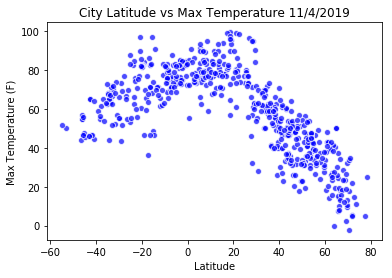

In [55]:
# City Latitude vs Max Temperature(F) scatter plot
x_axis = weather_df["lat"]
y_axis = weather_df["max_temp"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="blue", edgecolors='white',alpha = 0.7)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.title(f"City Latitude vs Max Temperature {report_date}")

plt.savefig('City_Latitude_vs_MaxTemp')
plt.grid(False)
plt.show()

#### Latitude vs. Humidity Plot

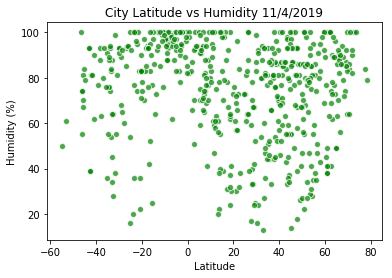

In [56]:
# City Latitude vs Percentage of Humidity scatter plot
x_axis = weather_df["lat"]
y_axis = weather_df["humidity"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="green", edgecolors='white',alpha = 0.7)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.title(f"City Latitude vs Humidity {report_date}")
plt.savefig("City_Latitude_vs_Humidity")
plt.grid(False)
plt.show()

#### Latitude vs. Cloudiness Plot

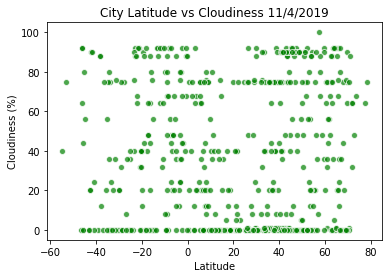

In [57]:
#City Latitude vs Percentage of Cloudiness scatter plot
x_axis = weather_df["lat"]
y_axis = weather_df["cloudiness"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="green", edgecolors='white',alpha = 0.7)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.title(f"City Latitude vs Cloudiness {report_date}")
plt.savefig("City_Latitude_vs_Cloudiness")
plt.grid(False)
plt.show()

#### Latitude vs. Wind Speed Plot

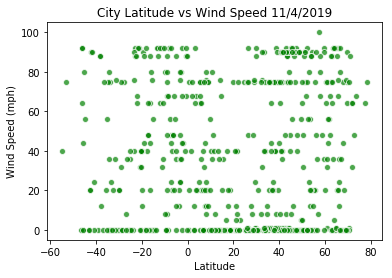

In [58]:
# City Latitude vs Wind Speed(mph)
x_axis = weather_df["lat"]
y_axis = weather_df["windspeed"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="green", edgecolors='white',alpha = 0.7)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.title(f"City Latitude vs Wind Speed {report_date}")
plt.savefig("City_Latitude_vs_Wind_Speed")
plt.show()